In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Load your data
df = pd.read_csv("__Final_Structured_Crypto_Data.csv")  # Change filename if needed
df['Time'] = pd.to_datetime(df['Time'])
df['Symbol'] = df['Symbol'].str.upper().str.strip()

# Ensure numeric types
for col in ['Open', 'Close', 'High', 'Low']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['Close', 'Open', 'High', 'Low', 'Symbol'])

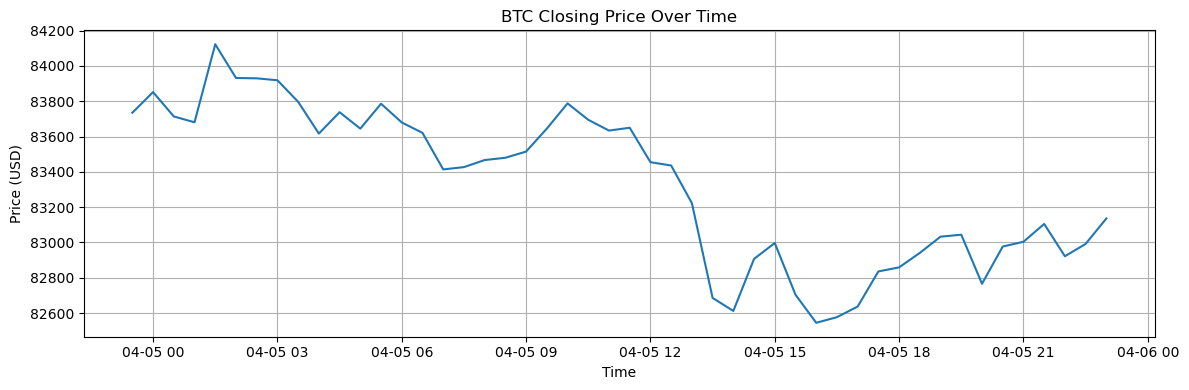

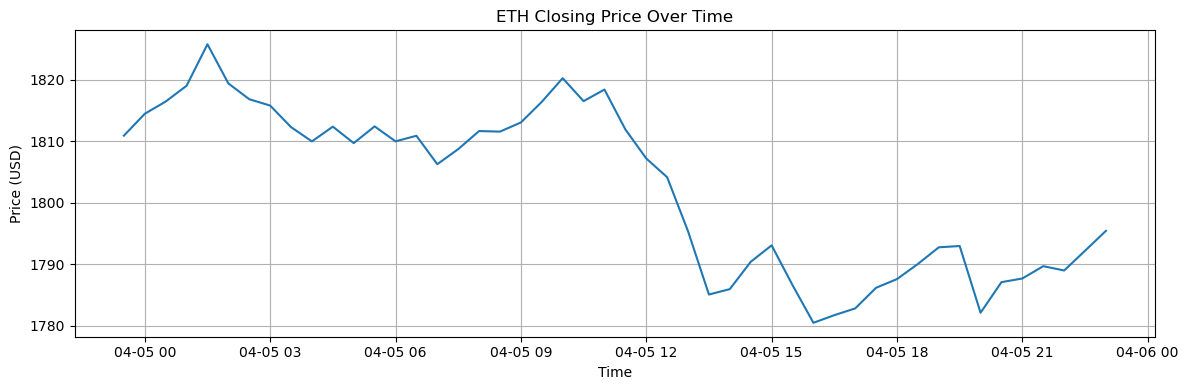

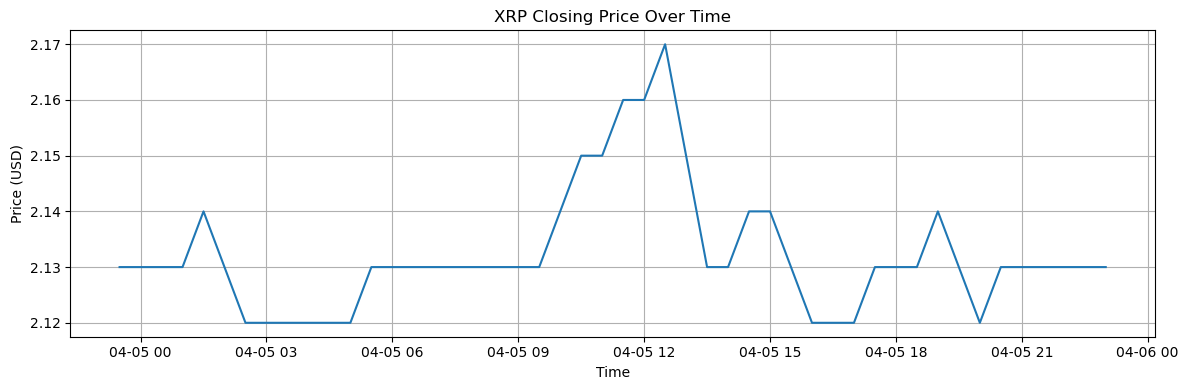

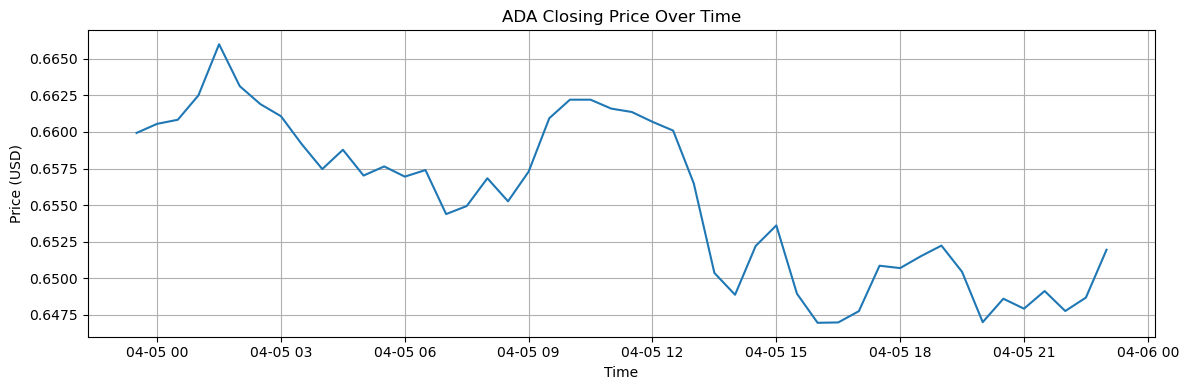

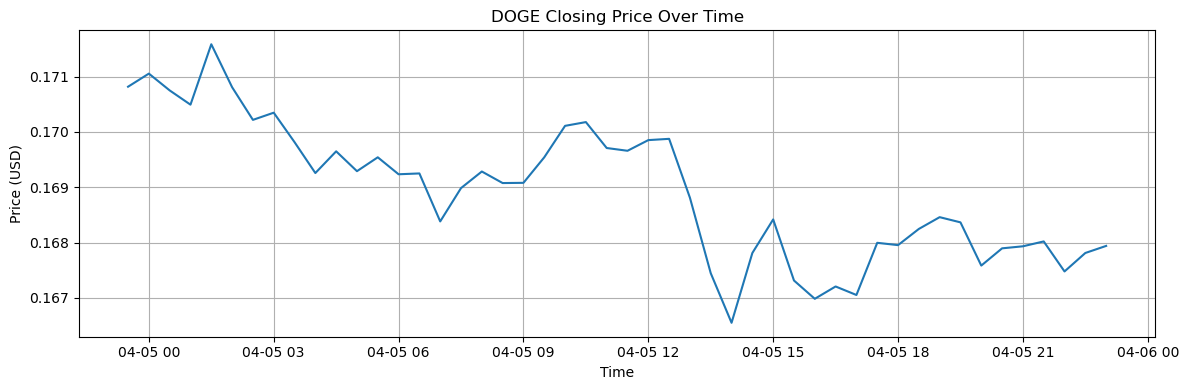

In [34]:
for symbol in df['Symbol'].unique():
    temp = df[df['Symbol'] == symbol]
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=temp, x='Time', y='Close', errorbar=None)
    plt.title(f"{symbol} Closing Price Over Time")
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

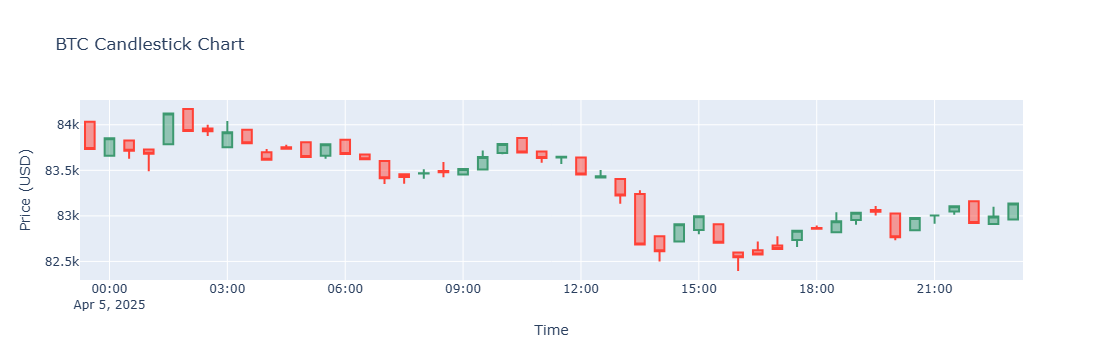

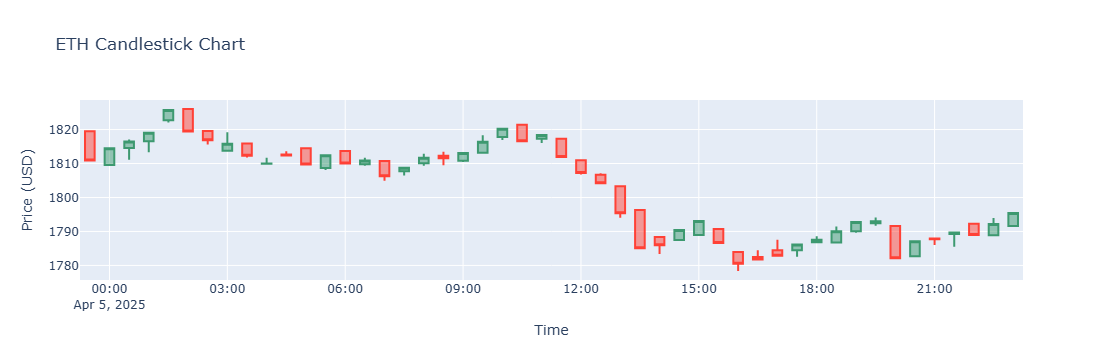

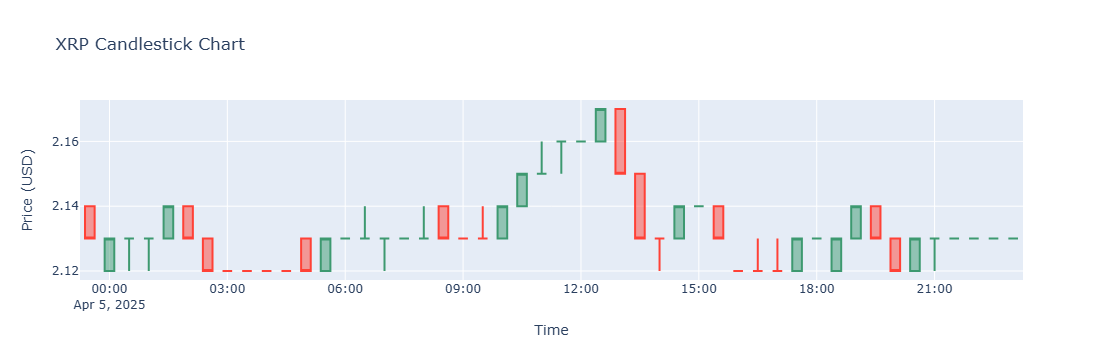

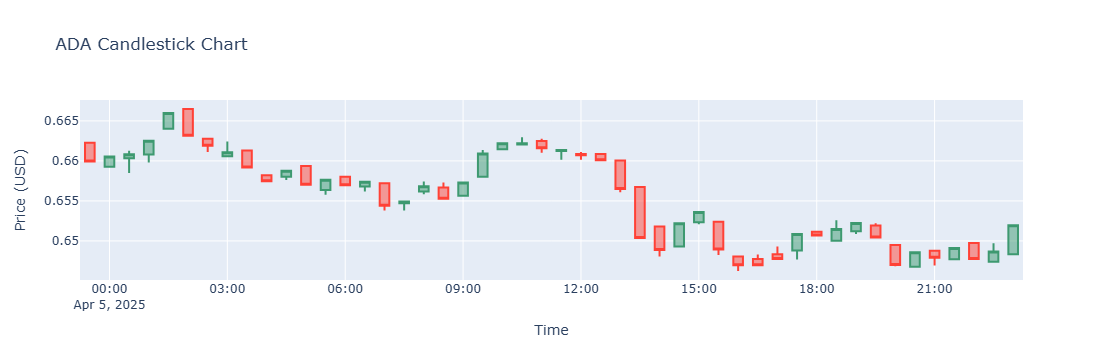

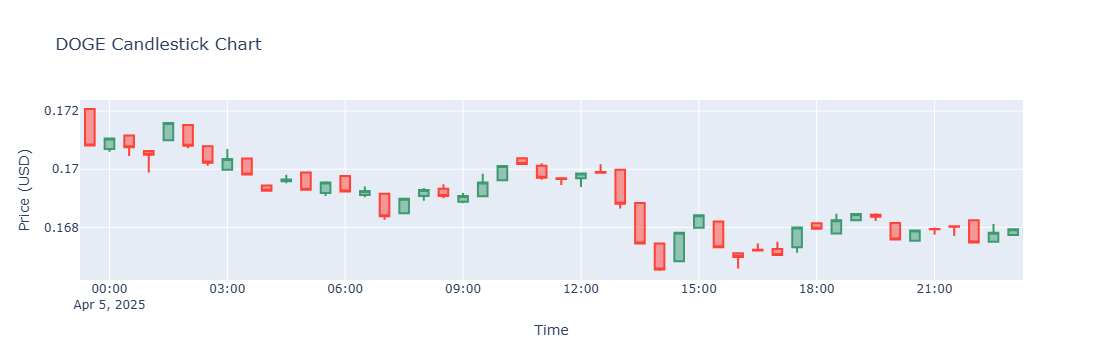

In [36]:
for symbol in df['Symbol'].unique():
    temp = df[df['Symbol'] == symbol]
    fig = go.Figure(data=[go.Candlestick(
        x=temp['Time'],
        open=temp['Open'],
        high=temp['High'],
        low=temp['Low'],
        close=temp['Close'],
        name=symbol
    )])
    fig.update_layout(
        title=f"{symbol} Candlestick Chart",
        xaxis_title="Time",
        yaxis_title="Price (USD)",
        xaxis_rangeslider_visible=False
    )
    fig.show()

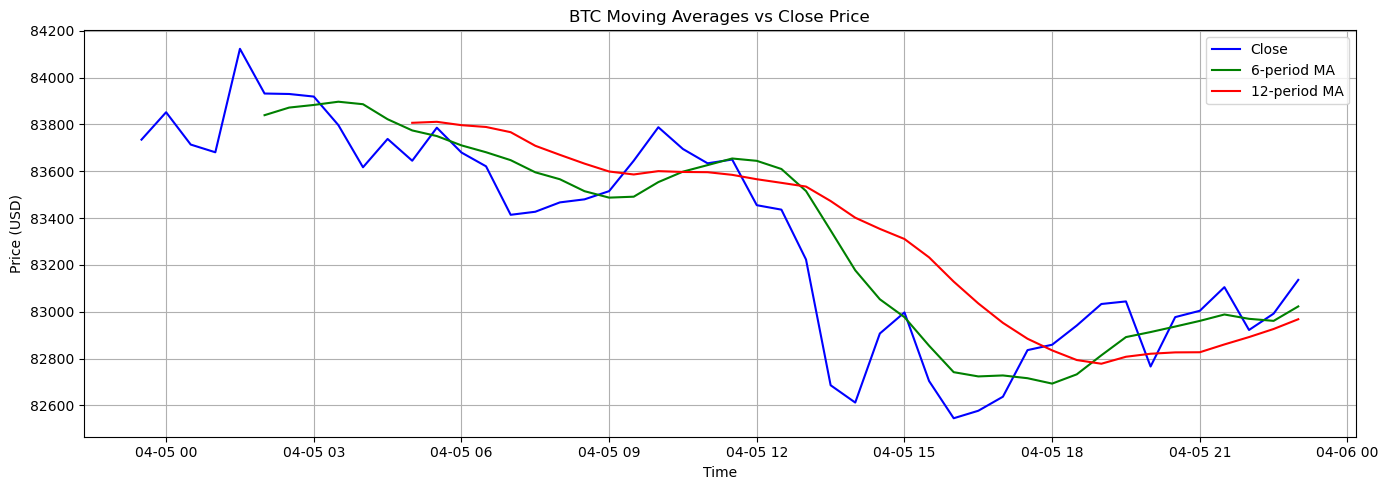

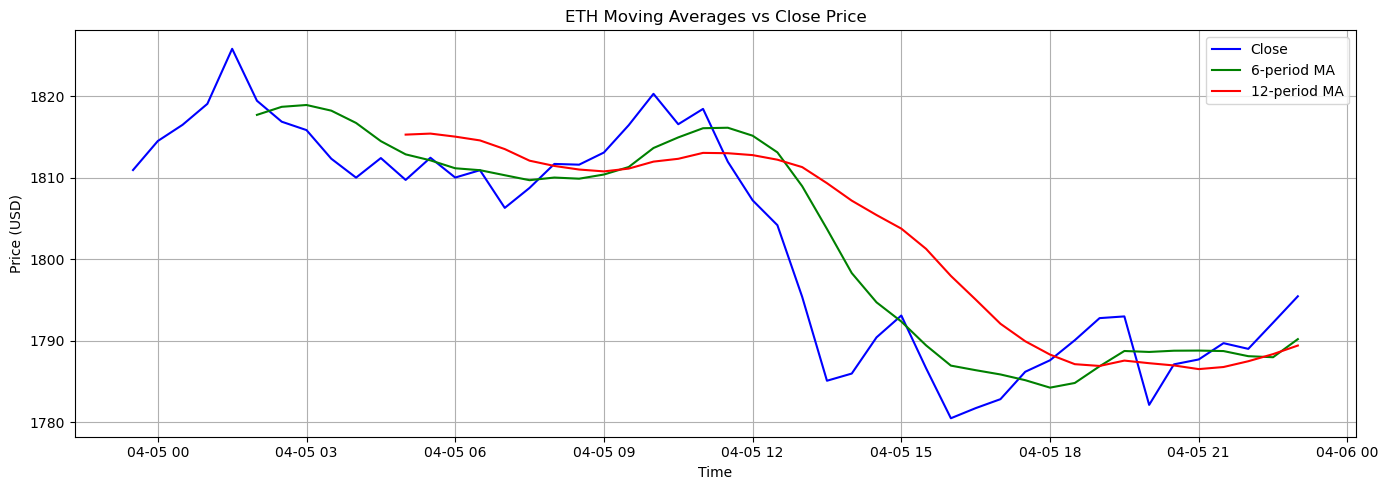

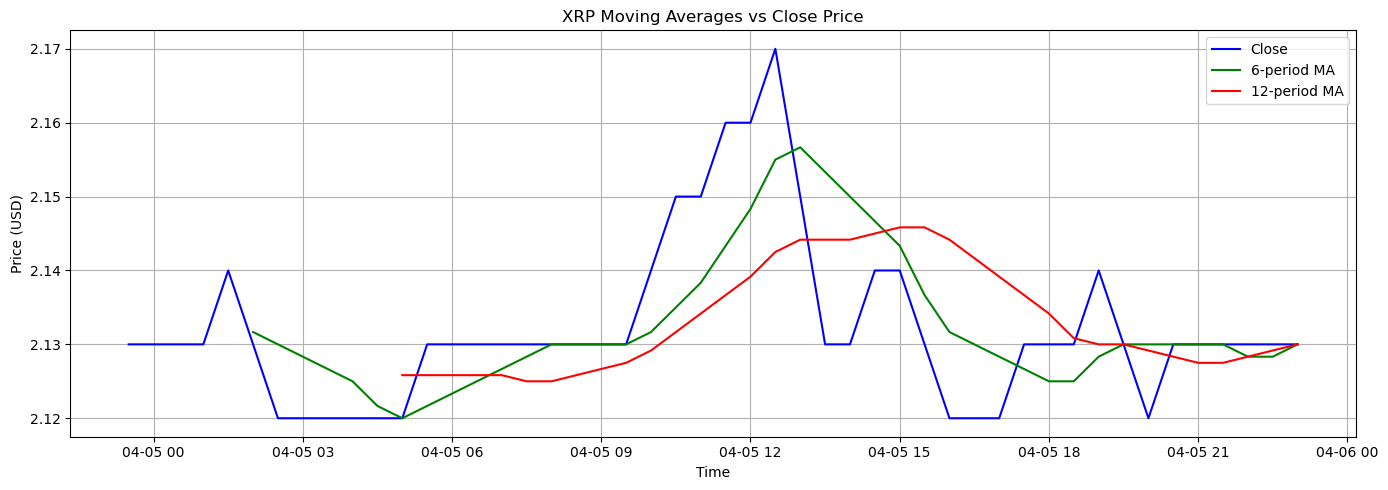

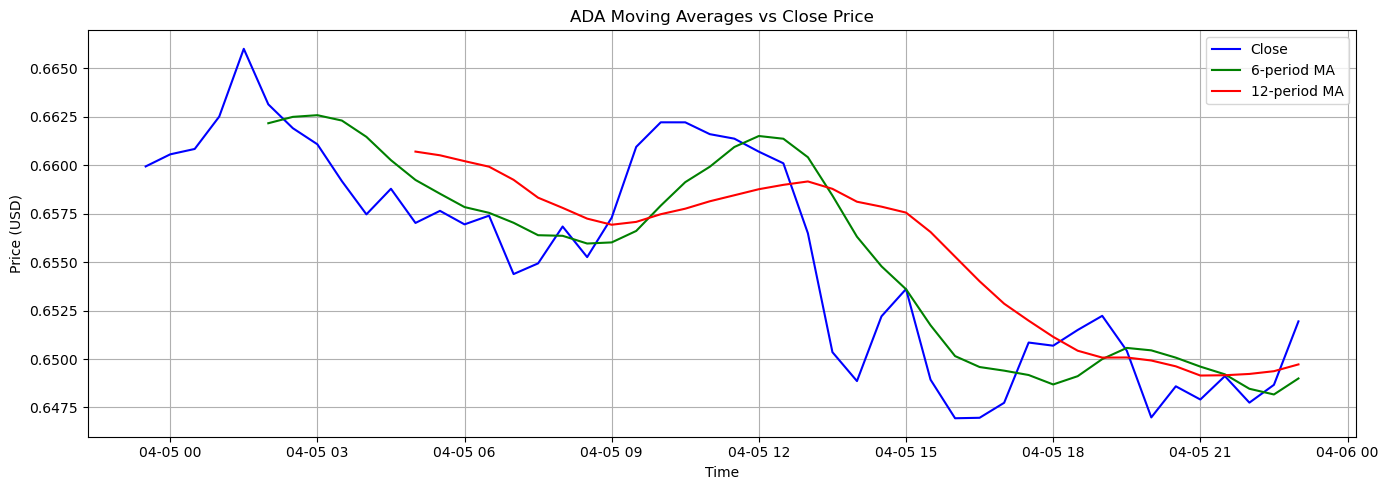

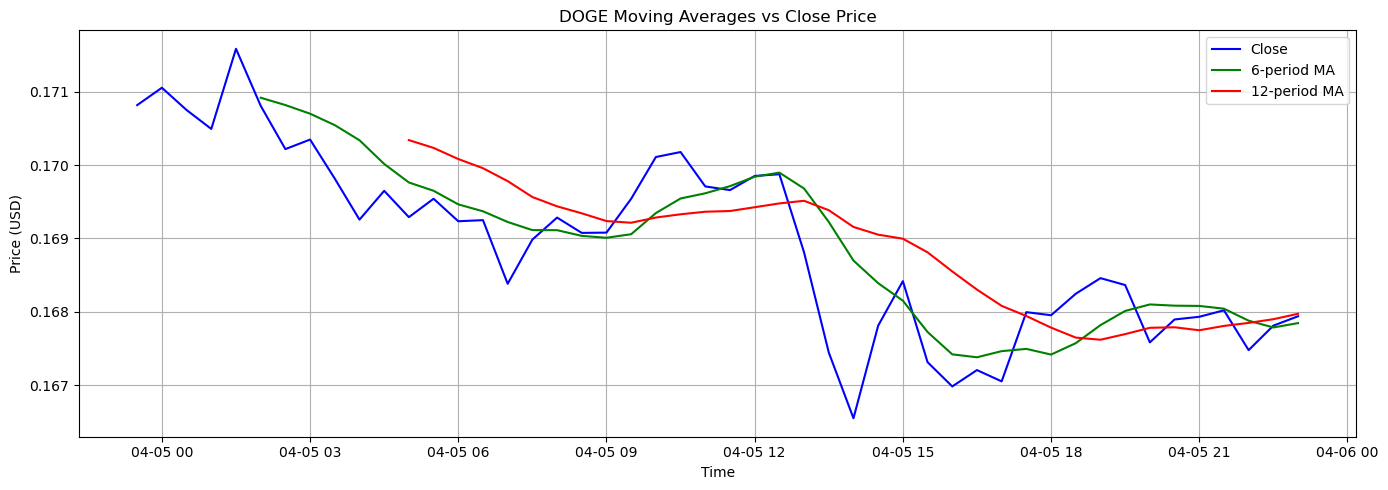

In [38]:
for symbol in df['Symbol'].unique():
    temp = df[df['Symbol'] == symbol].copy()
    temp['MA_6'] = temp['Close'].rolling(window=6).mean()
    temp['MA_12'] = temp['Close'].rolling(window=12).mean()

    plt.figure(figsize=(14, 5))
    plt.plot(temp['Time'], temp['Close'], label='Close', color='blue')
    plt.plot(temp['Time'], temp['MA_6'], label='6-period MA', color='green')
    plt.plot(temp['Time'], temp['MA_12'], label='12-period MA', color='red')
    plt.title(f"{symbol} Moving Averages vs Close Price")
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

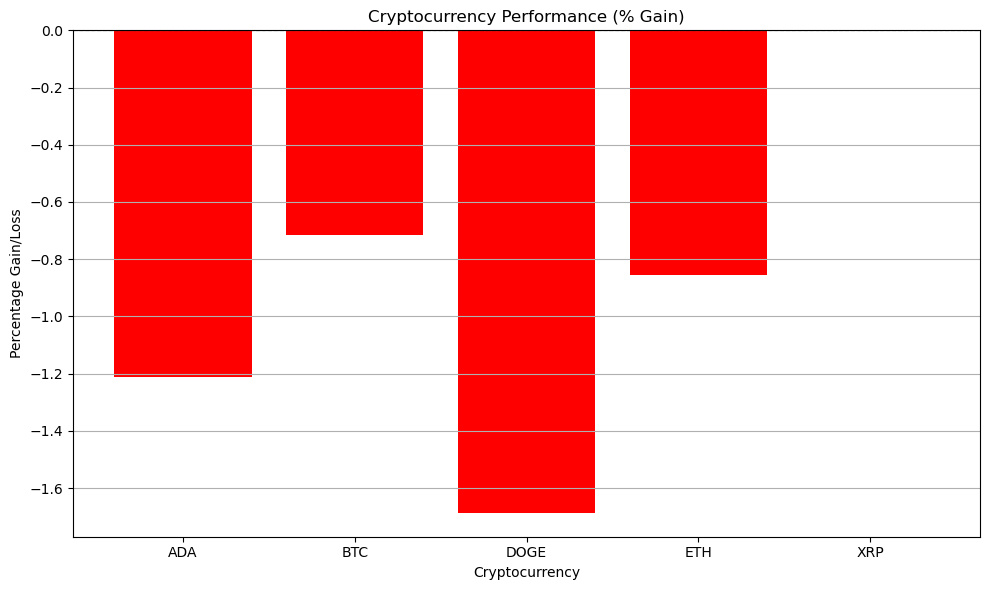

In [46]:
import matplotlib.pyplot as plt

# Calculate percentage gain
returns = df.sort_values('Time').groupby('Symbol').agg(
    Start_Price=('Close', 'first'),
    End_Price=('Close', 'last')
)
returns['% Gain'] = ((returns['End_Price'] - returns['Start_Price']) / returns['Start_Price']) * 100

# Create color list: green for gain, red for loss
colors = ['green' if x > 0 else 'red' for x in returns['% Gain']]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(returns.index, returns['% Gain'], color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Cryptocurrency Performance (% Gain)")
plt.ylabel("Percentage Gain/Loss")
plt.xlabel("Cryptocurrency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()